# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key, geo_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [110]:
def name_to_lat_lon(city_name):
    cont = json.loads(requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={weather_api_key}").content)
    try:
        test_content = {"lat":cont[0]["lat"],"lon":cont[0]["lon"]}
        return test_content
    except:
        print(f"No Dice On The City Of {city_name} Sending 12s")
        return {"lat":12,"lon":12}
        

### Generate the Cities List by Using the `citipy` Library

In [107]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities[0]
# print(list(set(lat_lngs))[0])

Number of cities in the list: 607


'busselton'

In [108]:
def weather_data_from(city,url,api):
    city_lat_lon = name_to_lat_lon(city)
    city_url = url + f"lat={city_lat_lon['lat']}&lon={city_lat_lon['lon']}&appid={api}"
    city_weather = requests.get(city_url)
    return json.loads(city_weather.content)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [109]:
# Set the API base URL

url = f"https://api.openweathermap.org/data/3.0/onecall?"

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [111]:

# Create counters
record_count = 1
set_count = 1
new_city_data = []
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # url + f"lat={city_lat_lon['lat']}&lon={city_lat_lon['lon']}&appid={weather_api_key}"
    # ltlng_city = name_to_lat_lon(city)
    # city_url = url + f"lat={ltlng_city['lat']}&lon{ltlng_city['lon']}&appid={weather_api_key}"
    city_lat_lon = name_to_lat_lon(city)
    city_url = url + f"lat={city_lat_lon['lat']}&lon={city_lat_lon['lon']}&appid={weather_api_key}"
    # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        "city_weather = json.loads(requests.get(city_url).content) "
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["lat"]
        city_lng = city_weather["lon"]
        city_max_temp = city_weather["daily"][0]["temp"]["max"]
        city_humidity = city_weather["current"]["humidity"]
        city_clouds = city_weather["current"]["clouds"]
        city_wind = city_weather["current"]["wind_speed"]
        city_country = city_weather["timezone"]
        city_date = city_weather["current"]["dt"]

        # Append the City information into city_data list
        city_w={"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        }
        # print(city_w)                          
        city_data.append(city_w)
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ewa beach
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | farim
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | nanakuli
Processing Record 10 of Set 1 | sorland
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | port hardy
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | chipinge
Processing Record 16 of Set 1 | ploufragan
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | palmas bellas
Processing Record 23 of Set 1 | ribeira grande
Processing Record 24 of Set 1 | co

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          607
Lat           607
Lng           607
Max Temp      607
Humidity      607
Cloudiness    607
Wind Speed    607
Country       607
Date          607
dtype: int64

In [114]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6445,115.3489,302.39,83,2,5.41,Australia/Perth,1675895673
1,ewa beach,21.3156,-158.0088,298.69,54,0,7.72,Pacific/Honolulu,1675895674
2,yellowknife,62.4541,-114.3774,253.66,84,20,2.57,America/Yellowknife,1675895676
3,tuktoyaktuk,69.4440,-133.0319,245.96,68,20,2.06,America/Inuvik,1675895678
4,saskylakh,71.9650,114.0939,235.87,100,83,2.89,Asia/Yakutsk,1675895679


In [116]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [121]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6445,115.3489,302.39,83,2,5.41,Australia/Perth,1675895673
1,ewa beach,21.3156,-158.0088,298.69,54,0,7.72,Pacific/Honolulu,1675895674
2,yellowknife,62.4541,-114.3774,253.66,84,20,2.57,America/Yellowknife,1675895676
3,tuktoyaktuk,69.4440,-133.0319,245.96,68,20,2.06,America/Inuvik,1675895678
4,saskylakh,71.9650,114.0939,235.87,100,83,2.89,Asia/Yakutsk,1675895679


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

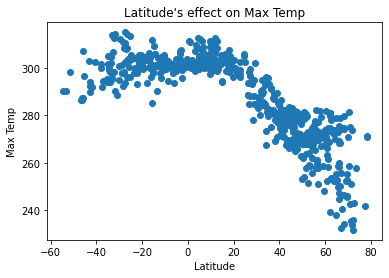

In [122]:
def scattered_like_sand(x,y,xl,yl,title):
    plt.scatter(x=x,y=y)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    
def lat_sand(factor):
    scattered_like_sand(city_data_df["Lat"],city_data_df[factor],"Latitude",factor,f"Latitude's effect on {factor}")
    
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp")
lat_sand("Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

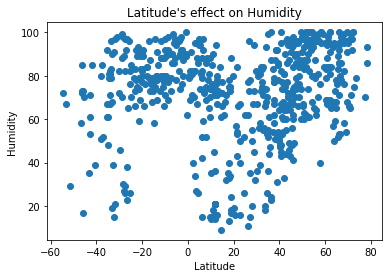

In [123]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity")
lat_sand("Humidity")



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

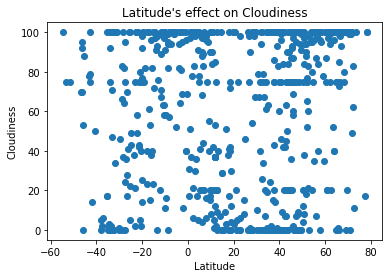

In [124]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness")
lat_sand("Cloudiness")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

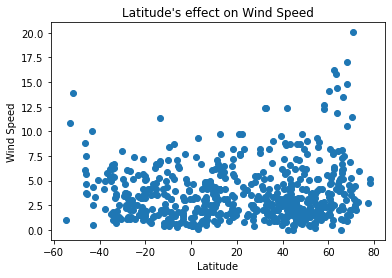

In [125]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed")
lat_sand("Wind Speed")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [138]:
# Define a function to create Linear Regression plots
def generate_lin_regress_plot(data_x,data_y,title):
    plt.scatter(data_x,y=data_y)
    plt.title(title)
    (s,i,r,p,stdv) = linregress(data_x,data_y) 
    regress = data_x * s + i
    plt.plot(data_x,regress, "r-")
    print(f"y = {s}x+{i}")
    print("rval:",r)

In [127]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ewa beach,21.3156,-158.0088,298.69,54,0,7.72,Pacific/Honolulu,1675895674
2,yellowknife,62.4541,-114.3774,253.66,84,20,2.57,America/Yellowknife,1675895676
3,tuktoyaktuk,69.4440,-133.0319,245.96,68,20,2.06,America/Inuvik,1675895678
4,saskylakh,71.9650,114.0939,235.87,100,83,2.89,Asia/Yakutsk,1675895679
6,farim,36.1758,53.2654,275.26,100,100,1.11,Asia/Tehran,1675895682


In [128]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6445,115.3489,302.39,83,2,5.41,Australia/Perth,1675895673
5,mount gambier,-37.8247,140.7820,300.03,51,5,2.09,Australia/Adelaide,1675895680
7,punta arenas,-53.1626,-70.9078,290.20,67,75,10.80,America/Punta_Arenas,1675895683
11,cape town,-33.9290,18.4174,298.62,67,0,6.71,Africa/Johannesburg,1675895688
13,new norfolk,-42.7802,147.0615,294.19,61,100,0.45,Australia/Hobart,1675895691


###  Temperature vs. Latitude Linear Regression Plot

y = -0.7805879856718465x+311.9914860966198
rval: -0.894137940530139


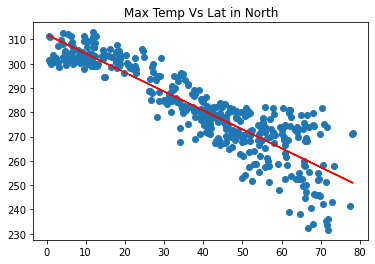

In [140]:
# Linear regression on Northern Hemisphere
generate_lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp Vs Lat in North")

y = 0.12970726912948563x+303.3615961401905
rval: 0.2946448037688939


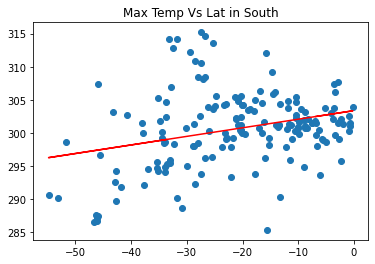

In [141]:
# Linear regression on Southern Hemisphere
generate_lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp Vs Lat in South")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

north and south temps react strongly to lat in opposite directions. because they are the same graph flipped essentially. mirrored 

### Humidity vs. Latitude Linear Regression Plot

y = 0.5047316453320427x+49.94027461416333
rval: 0.43310396351811864


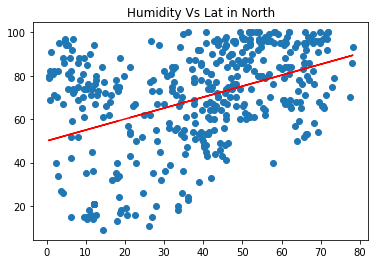

In [142]:
# Northern Hemisphere
generate_lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity Vs Lat in North")


y = 0.6494943455369624x+90.13655703256033
rval: 0.445101915204168


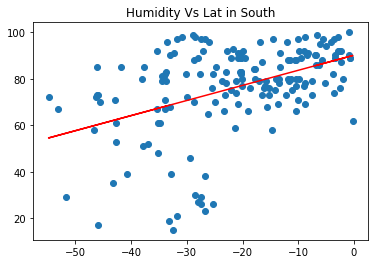

In [143]:
# Southern Hemisphere
generate_lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity Vs Lat in South")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

southern hemisphere no link. morthern hemisphere has slight positive link

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.5569181937800832x+36.97286178309507
rval: 0.29083348619590826


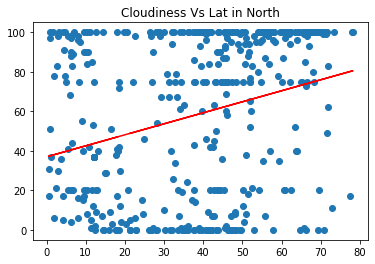

In [144]:
# Northern Hemisphere
generate_lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness Vs Lat in North")


y = 0.7868390315523232x+80.74279306227089
rval: 0.2833512958161321


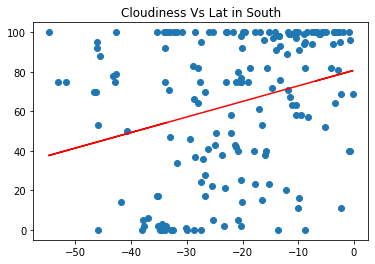

In [145]:
# Southern Hemisphere
generate_lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness Vs Lat in South")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

low r value means not very correlated. only slightly positively linked

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.023139341909926094x+3.0084078024742427
rval: 0.16108140961216794


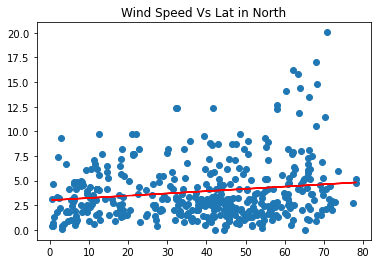

In [146]:
# Northern Hemisphere
generate_lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed Vs Lat in North")


y = -0.04585938925105746x+2.663506143091009
rval: -0.2471317312733618


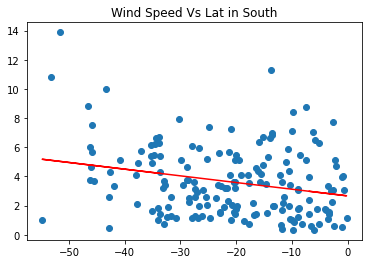

In [147]:
# Southern Hemisphere
generate_lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed Vs Lat in South")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Slightly negative correlation.
only 6%